# Session 3 - Time Series Extraction
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes are written and executed in Jupyter Notebook. Students are provided with the respective databases. Session 3 will focus on data extraction with time series.

#### Session: 3
#### Time: 4pm- 6pm
#### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

In [1]:
import time

# Table of Contents
- [1. BCRP Webscrapping](#t1)
  - [1.1. Scrapping and searching for data](#t1.1)
  - [1.2. Plotting and downloading series](#t1.2)
- [2. Yahoo Finance](#t2)
  - [2.1. Importing stock prices from Yahoo Finance](#t2.1)
- [3. Extracting from other databases](#t3)
  - [3.1. Using Econdata](#t3.1)

# <a id="t1"></a>1. BCRP Webscrapping

In [2]:
!pip install bcrp-webscrapper

In [3]:
!pip show -f bcrp_webscrapper

Name: bcrp_webscrapper
Version: 1.0.5
Summary: Time series extraction from the Peruvian Central Bank Database (BCRP Statistics)
Home-page: https://github.com/estcab00/bcrp-webscrapper
Author: Esteban Cabrera
Author-email: 
License: 
Location: C:\Users\estca\anaconda3\Lib\site-packages
Requires: more-itertools, numpy, openpyxl, pandas, requests, selenium, unidecode, webdriver-manager
Required-by: 
Files:
  bcrp_webscrapper-1.0.5.dist-info\INSTALLER
  bcrp_webscrapper-1.0.5.dist-info\LICENSE
  bcrp_webscrapper-1.0.5.dist-info\METADATA
  bcrp_webscrapper-1.0.5.dist-info\RECORD
  bcrp_webscrapper-1.0.5.dist-info\REQUESTED
  bcrp_webscrapper-1.0.5.dist-info\WHEEL
  bcrp_webscrapper-1.0.5.dist-info\top_level.txt
  bcrp_webscrapper\__init__.py
  bcrp_webscrapper\__pycache__\__init__.cpython-312.pyc
  bcrp_webscrapper\__pycache__\bcrp.cpython-312.pyc
  bcrp_webscrapper\bcrp.py


In [4]:
from bcrp_webscrapper import *

In [5]:
from bcrp_webscrapper import bcrp
print(dir(bcrp))

['ActionChains', 'By', 'ChromeDriverManager', 'EC', 'IFrame', 'Keys', 'Options', 'SVG', 'Select', 'Service', 'StringIO', 'WebDriverWait', 'Workbook', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bcrp_dataframe', 'bcrp_graph', 'bcrp_scrapper', 'bcrp_search', 'display', 'download_graph', 'itertools', 'json', 'json_normalize', 'np', 'os', 'pd', 'random', 're', 'requests', 'scrapper_anual', 'scrapper_diario', 'scrapper_mensual', 'scrapper_trimestral', 'sleep', 'time', 'unidecode', 'urllib', 'webdriver']


## <a id="t1.1"></a>1.1. Scrapping and searching for data

The library allows you to search on the BCRP Statistics Database with the `bcrp_search()` function. It also allows you to directly scrap and turn into a dataframe through two different functions. `bcrp_scrapper()` uses sellenium while `bcrp_dataframe()` does not. We will see which one is more computionally efficient

### ```bcrp_search()```
This function allows us to search directly all the variables and series in the BCRP Statistics Database that match our input. This allows us to get the code of the variable and then scrap it. 

In [6]:
bcrp.bcrp_search("PBI")

,Código,Descripción,Frecuencia
0,PN39868FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
1,PN39867FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
2,PN39866FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
3,PN39524FM,Operaciones del sector público no financiero (...,Mensual
4,PN39351BQ,Posición de activos y pasivos externos (porcen...,Trimestral
...,...,...,...
1015,CD10438DA,"PIB nominal y real, agregado y per cápita, 193...",Anual
1016,CD10437DA,"PIB nominal y real, agregado y per cápita, 193...",Anual
1017,CD10435DA,"PIB nominal y real, agregado y per cápita, 193...",Anual
1018,CD10434DA,"PIB nominal y real, agregado y per cápita, 193...",Anual


In [7]:
bcrp.bcrp_search("Inflación")

,Código,Descripción,Frecuencia
0,PN09830PM,Inflación de socios comerciales - IPC Externo ...,Mensual
1,PN09828PM,Inflación de socios comerciales - IPC Externo ...,Mensual
2,PN01311PM,Índice de precios al consumidor Lima Metropoli...,Mensual
3,PN01310PM,Índice de precios al consumidor Lima Metropoli...,Mensual
4,PN01309PM,Índice de precios al consumidor Lima Metropoli...,Mensual
5,PN01308PM,Índice de precios al consumidor Lima Metropoli...,Mensual
6,PN01306PM,Índice de precios al consumidor Lima Metropoli...,Mensual
7,PN01305PM,Índice de precios al consumidor Lima Metropoli...,Mensual
8,PN01304PM,Índice de precios al consumidor Lima Metropoli...,Mensual
9,PN01303PM,Índice de precios al consumidor Lima Metropoli...,Mensual


We can also specify the frequency of the series we are looking for

In [8]:
bcrp.bcrp_search("PBI", "Trimestral")

,Código,Descripción,Frecuencia
0,PN39868FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
1,PN39867FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
2,PN39866FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
4,PN39351BQ,Posición de activos y pasivos externos (porcen...,Trimestral
5,PN39029BQ,Producto bruto interno (millones US$) - PBI (m...,Trimestral
...,...,...,...
425,PN02438FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
426,PN02437FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
427,PN02436FQ,Flujos macroeconómicos (porcentaje del PBI) - ...,Trimestral
968,PD38589BQ,Posición de activos y pasivos internacionales ...,Trimestral


In [9]:
bcrp.bcrp_search("Expectativas")

,Código,Descripción,Frecuencia
0,PD39931AM,Expectativas empresariales por zonas - Zona Su...,Mensual
1,PD39930AM,Expectativas empresariales por zonas - Zona Su...,Mensual
2,PD39929AM,Expectativas empresariales por zonas - Zona Su...,Mensual
3,PD39928AM,Expectativas empresariales por zonas - Zona Su...,Mensual
4,PD39927AM,Expectativas empresariales por zonas - Zona Su...,Mensual
...,...,...,...
113,PD38044AM,Expectativas empresariales totales - Índice de...,Mensual
114,PD38043AM,Expectativas empresariales totales - Índice de...,Mensual
115,PD38042AM,Expectativas empresariales totales - Índice de...,Mensual
116,PD38041AM,Expectativas empresariales totales - Índice de...,Mensual


In [10]:
st = time.time()
bcrp.bcrp_search('Inflación')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 6.099143981933594 seconds


In [11]:
st = time.time()
bcrp.bcrp_search('Inflación', 'Mensual')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.949784517288208 seconds


In [12]:
st = time.time()
bcrp.bcrp_search('PBI', 'Trimestral')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 6.652432203292847 seconds


In [13]:
st = time.time()
bcrp.bcrp_search('Expectativas', 'Mensual')
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.892908573150635 seconds


### ```bcrp_scrapper()```
Allow us to scrap a variable by providing its code and frequency. Then transforms it into a dataframe by providing a start and end date. Since the function uses sellenium it is computionally inneficient. 

In [14]:
bcrp.bcrp_scrapper('PD04637PD', '2012-03-12' , '2022-05-30' , 'Diario' ).head()

,Tipo de cambio - TC Interbancario (S/ por US$) - Compra
Fecha,
2012-03-12,2.668
2012-03-13,2.669
2012-03-14,2.669
2012-03-15,2.671
2012-03-16,2.670


In [15]:
bcrp.bcrp_scrapper( ['PD04637PD', 'PD04638PD'] , '2012-03-12' , '2022-05-30' , 'Diario' ).head()

,Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Tipo de cambio - TC Interbancario (S/ por US$) - Venta
Fecha,,
2012-03-12,2.668,2.669
2012-03-13,2.669,2.670
2012-03-14,2.669,2.670
2012-03-15,2.671,2.673
2012-03-16,2.670,2.671


In [16]:
bcrp.bcrp_scrapper(['PN01288PM', 'PN01218PM', 'PN01219PM'], '2009-06', '2020-03', 'Mensual' ).head()

,Tipo de cambio - fin de periodo (S/ por US$) - Bancario - Venta,Tipo de cambio - fin de periodo (S/ por US$) - Bancario - Promedio,Índice de precios Lima Metropolitana (índice 2009 = 100) (descontinuada) - IPC Sin Alimentos
Fecha,,,
2009-06-01,3.011,3.010,99.60
2009-07-01,2.987,2.986,99.75
2009-08-01,2.948,2.947,99.61
2009-09-01,2.885,2.884,99.65
2009-10-01,2.906,2.904,99.54


In [17]:
bcrp.bcrp_scrapper(['PN39030BQ', 'PD37942PQ'], '2020-03', '2022-06', 'Trimestral').head()

,"Departamentos (Sector Alto): Barranco, La Molina, Miraflores, San Borja, San Isidro y Surco - Precios por m2 (S/ Constantes del 2009)",Balanza comercial - valores FOB (millones US$) - Exportaciones
Fecha,,
2020-03-01,4901,10298
2020-06-01,5095,6779
2020-09-01,5180,11689
2020-12-01,5278,14060
2021-03-01,5242,13594


In [18]:
bcrp.bcrp_scrapper(['PD09919MA', 'PD09920MA', 'PD09921MA', 'PD09922MA', 'PD09923MA', 'PD09924MA', 'PD09925MA', 'PD09926MA', 'PD09932MA', 'PD09933MA'], '2009-01', '2023-01', 'Anual').head()

,Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - Total - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - ME (millones S/),Crédito al sector privado del sistema bancario (fin de periodo) - Sistema Bancario - ME (millones US$),Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - Total - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - ME (millones S/),Crédito al sector privado del sistema bancario (fin de periodo) - Empresas Bancarias - ME (millones US$),Crédito al sector privado del sistema bancario (fin de periodo) - Banco de la Nación - MN,Crédito al sector privado del sistema bancario (fin de periodo) - Banco de la Nación - ME (millones S/)
Fecha,,,,,,,,,,
2009-01-01,91768,45943,45826,15857,89300,43585,45714,15818,2358,111
2010-01-01,104896,54690,50206,17867,101922,51768,50155,17849,2922,51
2011-01-01,127594,65297,62298,23073,124475,62236,62239,23052,3061,58
2012-01-01,143382,74947,68435,26837,140161,71734,68427,26834,3213,7
2013-01-01,171752,94339,77413,27647,167703,90449,77253,27590,3889,159


In [19]:
st = time.time()
bcrp.bcrp_scrapper(['PN01288PM', 'PN01218PM', 'PN01219PM'], '2009-06', '2020-03', 'Mensual' ).head()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.6413798332214355 seconds


In [20]:
st = time.time()
bcrp.bcrp_scrapper(['PN39030BQ', 'PD37942PQ'], '2020-03', '2022-06', 'Trimestral').head()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 4.93169641494751 seconds


In [21]:
st = time.time()
bcrp.bcrp_scrapper(['PD09919MA', 'PD09920MA', 'PD09921MA', 'PD09922MA', 'PD09923MA', 'PD09924MA', 'PD09925MA', 'PD09926MA', 'PD09932MA', 'PD09933MA'], '2009-01', '2023-01', 'Anual').head()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.469477653503418 seconds


### ```bcrp_dataframe()```
Allow us to scrap a variable by providing its code and frequency. Then transforms it into a dataframe by providing a start and end date. This function is faster than `bcrp_scraper()`. 

In [22]:
series     = ['PN01271PM', 'PN01280PM', 'PN01282PM', 'PN01278PM', 'PN09817PM','PN09816PM', 'PN01276PM', 'PN01313PM', 'PN01314PM',  
             'PN01315PM', 'PN09818PM','PN01286PM']
start_date = '2003-01'
end_date   = '2023-12'
freq       = 'Mensual'

In [23]:
df_1 = bcrp.bcrp_dataframe( series , start_date , end_date , freq )
df_1.head()

,Índice de precios Lima Metropolitana (var% mensual) - IPC,Índice de precios Lima Metropolitana (var% mensual) - IPC Transables,Índice de precios Lima Metropolitana (var% mensual) - IPC No Transables,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente,Índice de precios Lima Metropolitana (var% mensual) - IPC No Subyacente,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente Sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Importado,Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor
Fecha,,,,,,,,,,,,
2003-01-01,0.231420,0.179002,0.270381,-0.004192,0.593592,0.506054,-0.111733,0.398010,0.064330,-0.012549,0.702140,-0.161934
2003-02-01,0.468825,0.135374,0.708770,0.128185,0.992255,0.722192,0.228145,0.594648,0.406663,0.070296,0.727582,0.437078
2003-03-01,1.117780,0.400108,1.623551,0.157515,2.564665,0.357386,1.938313,-0.098522,2.136297,0.446856,1.391691,0.825606
2003-04-01,-0.050857,0.112646,-0.182128,0.074363,-0.260881,-0.265865,0.264059,-0.394477,0.305377,0.069202,0.275001,-0.212853
2003-05-01,-0.032025,-0.346022,0.181194,0.011232,-0.102900,-0.139973,0.055604,0.198020,-0.264172,0.177667,-1.113037,-0.141752


In [24]:
series     = ['PN00544MM', 'PN00541MM', 'PN00542MM', 'PN37627AM', 'RD13056DM', 'PN01755AM', 'PN01758AM', 'PN01759AM', 'PN01722AM', 'PN01766AM','PN01764AM', 'PN01725AM', 'PN01768AM']
start_date = '2003-01'
end_date   = '2023-12'
freq       = 'Mensual'

bcrp.bcrp_dataframe( series , start_date , end_date , freq ).head()

,"Crédito al sector privado de las sociedades creadoras de depósito, por tipo de crédito y por monedas - Saldos - ME - Consumo (millones US$)","Crédito al sector privado de las sociedades creadoras de depósito, por tipo de crédito y por monedas - Saldos - MN - Consumo (millones S/)","Crédito al sector privado de las sociedades creadoras de depósito, por tipo de crédito y por monedas - Saldos - MN - Hipotecario (millones S/)",Indicadores indirectos de la tasa de utilización de la capacidad instalada del sector manufacturero - Manufactura no primaria - Alimentos y bebidas,Producción de electricidad por departamento - Lima (gwh),Producto bruto interno y demanda interna (índice 2007=100) - Agropecuario,Producto bruto interno y demanda interna (índice 2007=100) - Pesca,Producto bruto interno y demanda interna (índice 2007=100) - Minería e Hidrocarburos,Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - Manufactura - Manufactura no Primaria,Producto bruto interno y demanda interna (índice 2007=100) - Construcción,Producto bruto interno y demanda interna (índice 2007=100) - Manufactura - Manufactura no Primaria,Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - Comercio,Producto bruto interno y demanda interna (índice 2007=100) - Otros Servicios
Fecha,,,,,,,,,,,,,
2003-01-01,510.589557,3234.671411,239.87879,34.191015,NaN,74.601641,32.785381,80.941525,NaN,53.237348,64.649009,NaN,75.268161
2003-02-01,515.976549,3281.811411,240.34079,31.942172,NaN,74.715044,27.520366,73.789674,NaN,68.825557,62.000577,NaN,73.612258
2003-03-01,505.196579,3394.481560,240.65340,34.505566,NaN,83.102319,27.329840,78.401214,NaN,60.154449,64.369234,NaN,75.492386
2003-04-01,507.403623,3424.804560,240.32440,33.514412,NaN,107.684573,131.748154,78.207038,NaN,53.569783,62.823356,NaN,82.212851
2003-05-01,508.236314,3529.538560,240.55740,34.866294,NaN,126.906591,116.353400,81.398576,NaN,60.782445,66.042349,NaN,81.477216


In [25]:
series     = ['PN38766BM', 'PN38779BM', 'PN38784BM', 'PN06484IM', 'PN01661XM', 'PN01662XM', 'PN01664XM', 'PN38810BM']
start_date = '2003-03'
end_date   = '2023-12'
freq       = 'Mensual'

In [26]:
st = time.time()
bcrp.bcrp_dataframe( series , start_date , end_date , freq )
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 1.868396282196045 seconds


In [27]:
series     = ['PN02528AQ', 'PN02539AQ', 'PN02529AQ', 'PN02533AQ', 'PN02530AQ', 'PN02534AQ']
start_date = '2003-03'
end_date   = '2024-06'
freq       = 'Trimestral'

In [28]:
st = time.time()
bcrp.bcrp_dataframe( series , start_date , end_date , freq )
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 3.615424633026123 seconds


### Summary of functions

|             |   `bcrp_search`       | `bcrp_scrapper`            | `bcrp_dataframe`      |
|---------------------------------|------------------------------|---------------------------------|---------------------------------|
| **main input**                   | `variable name (str)`     | `variable code (str/list)`      |     `variable code (str/list)`                  |
| **start/end date**               | `no`     | `yes`      |     `yes`                  |
| **frequency**              | `optional`     | `yes`      |     `yes`                  |
| **output**                  | `dataframe with available variables`  | `dataframe with selected variables` | `dataframe with selected variables` |
| **uses sellenium**          | `yes`             | `yes`                   |`no`    |  





## <a id="t1.2"></a>1.2. Plotting and downloading series
We can graph and download the graphs of time series

### ```bcrp_graph()```
This functions automatically pictures the graph that the BCRP Statistic Database generates when searching for a variable.

Most recent download: C:\Users\estca/Downloads\grafico.png


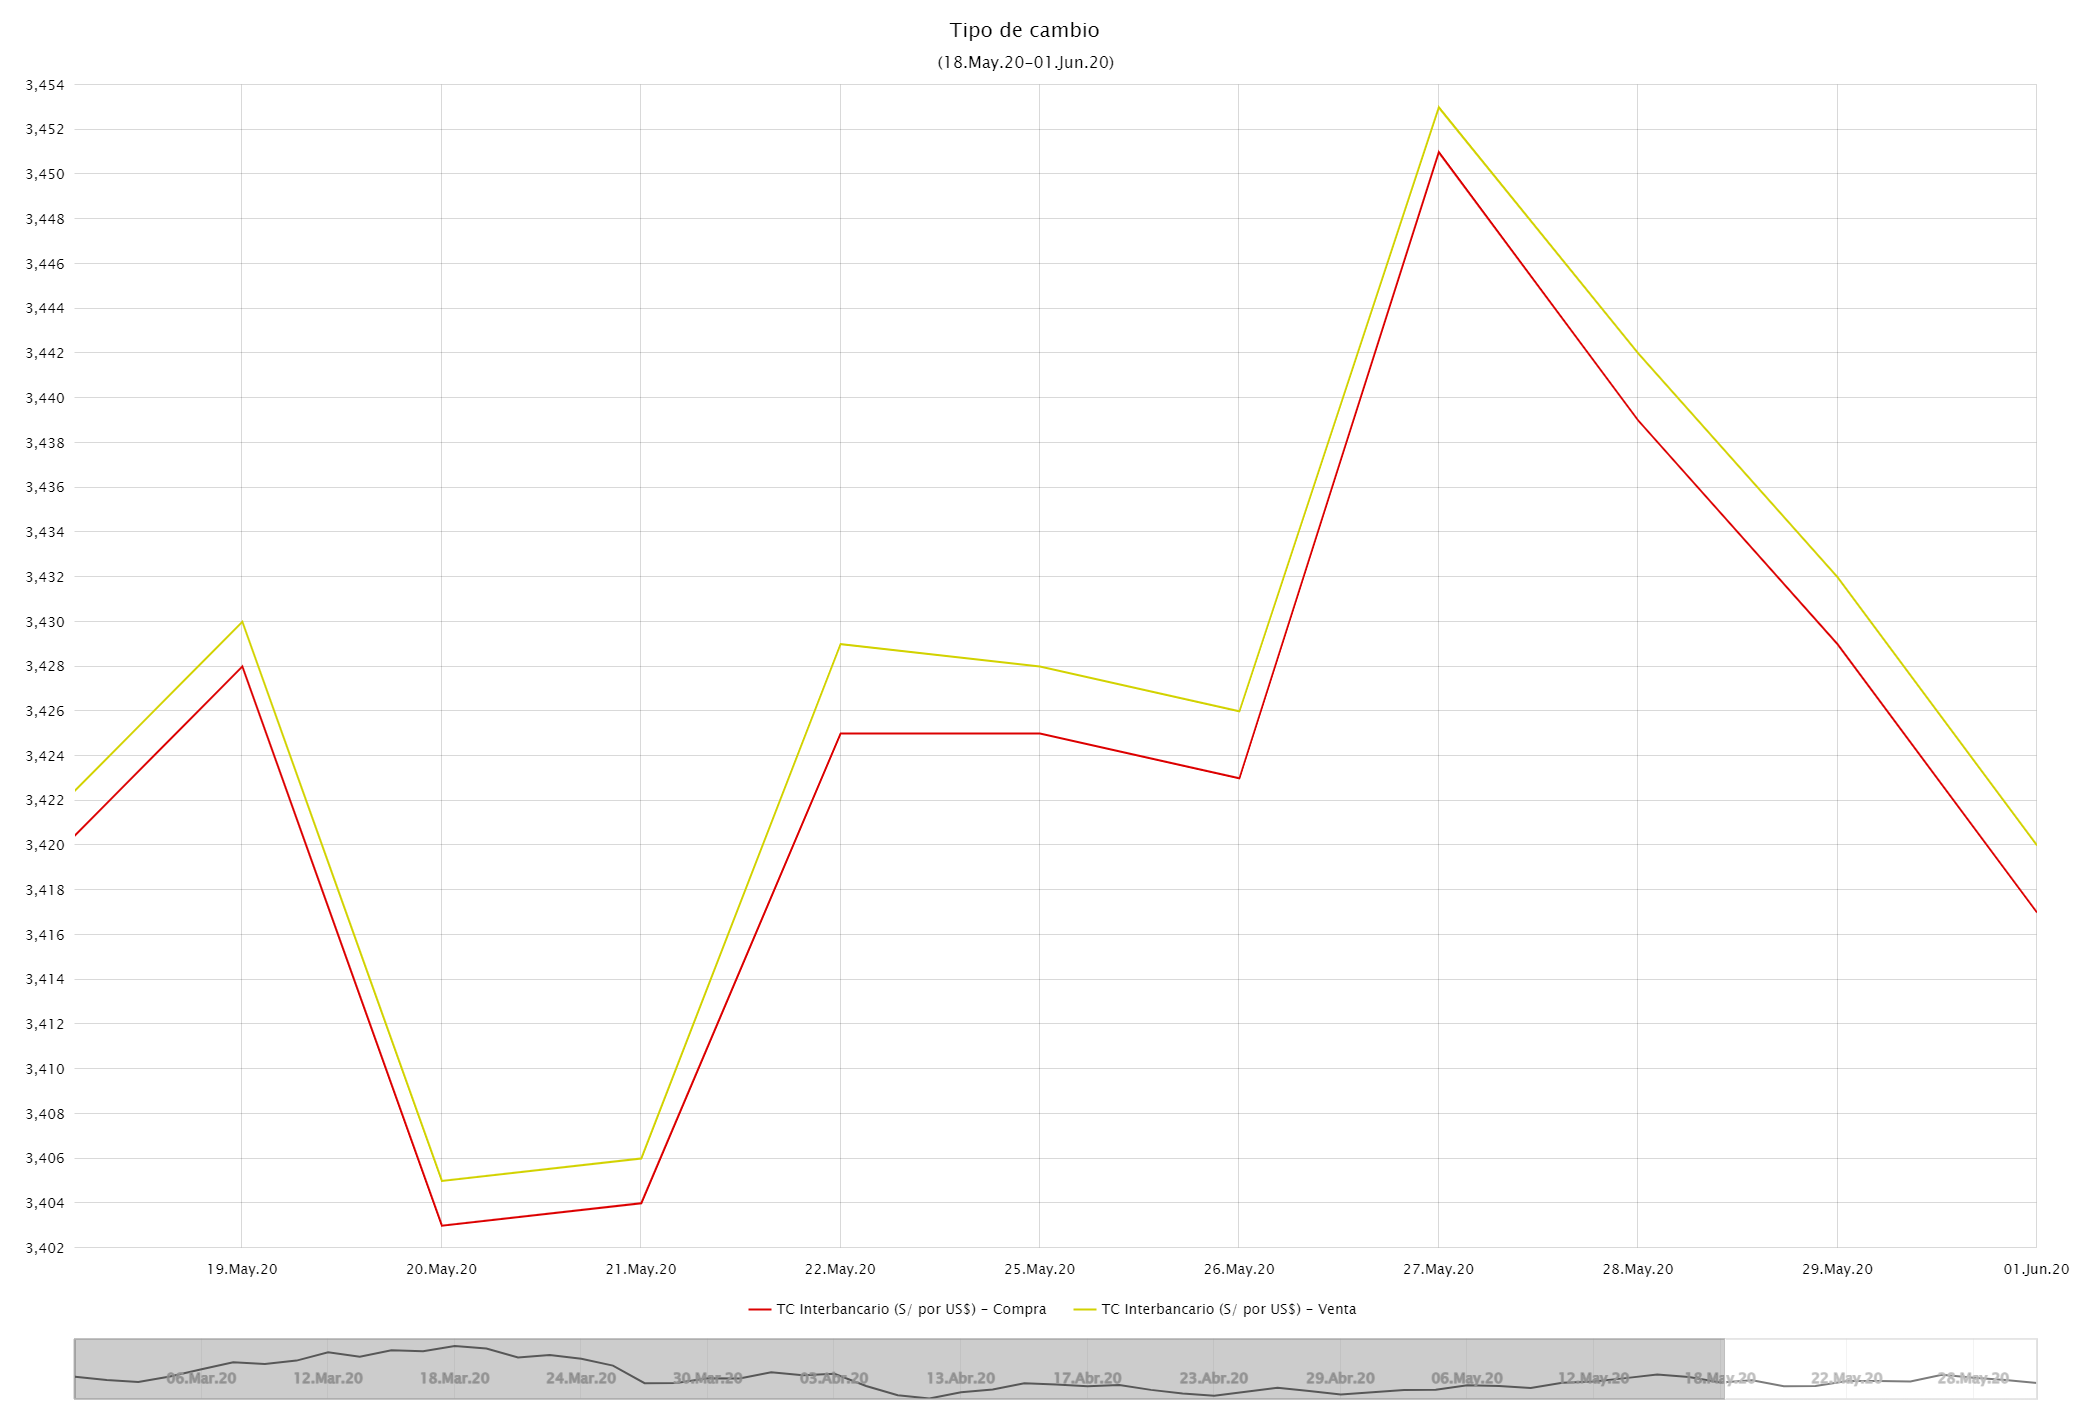

In [29]:
bcrp.bcrp_graph( ['PD04637PD', 'PD04638PD'] , '2020-03-01' , '2020-06-01')

Most recent download: C:\Users\estca/Downloads\grafico.jpg


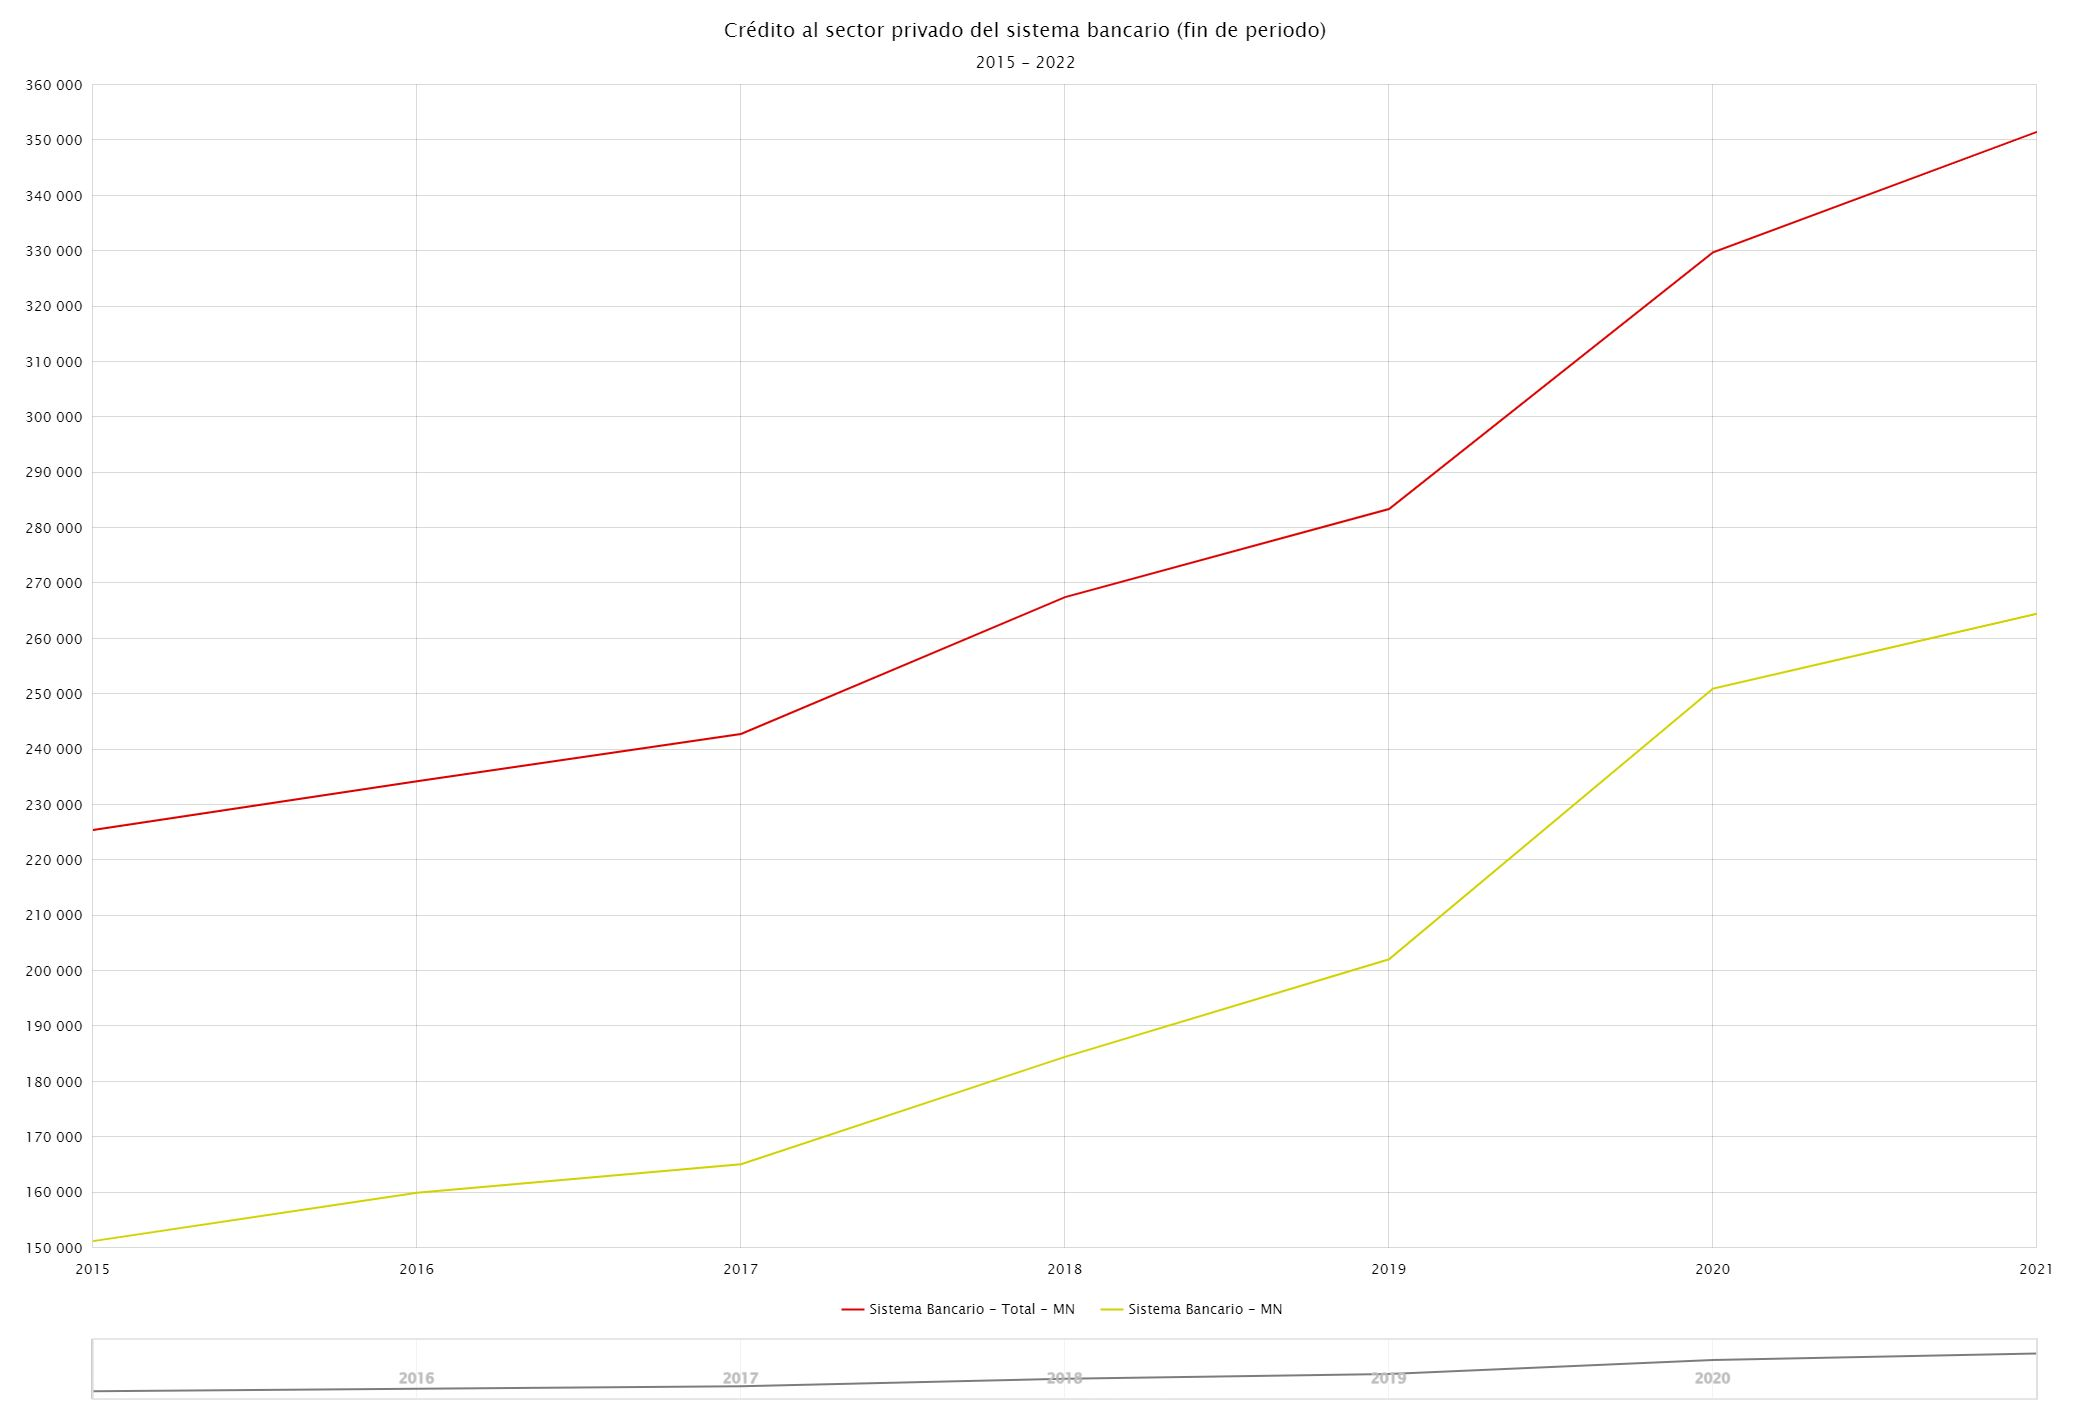

In [30]:
bcrp.bcrp_graph( ['PD09919MA', 'PD09920MA'] , '2015' , '2022' , format= 'jpg')

Most recent download: C:\Users\estca/Downloads\grafico (1).png


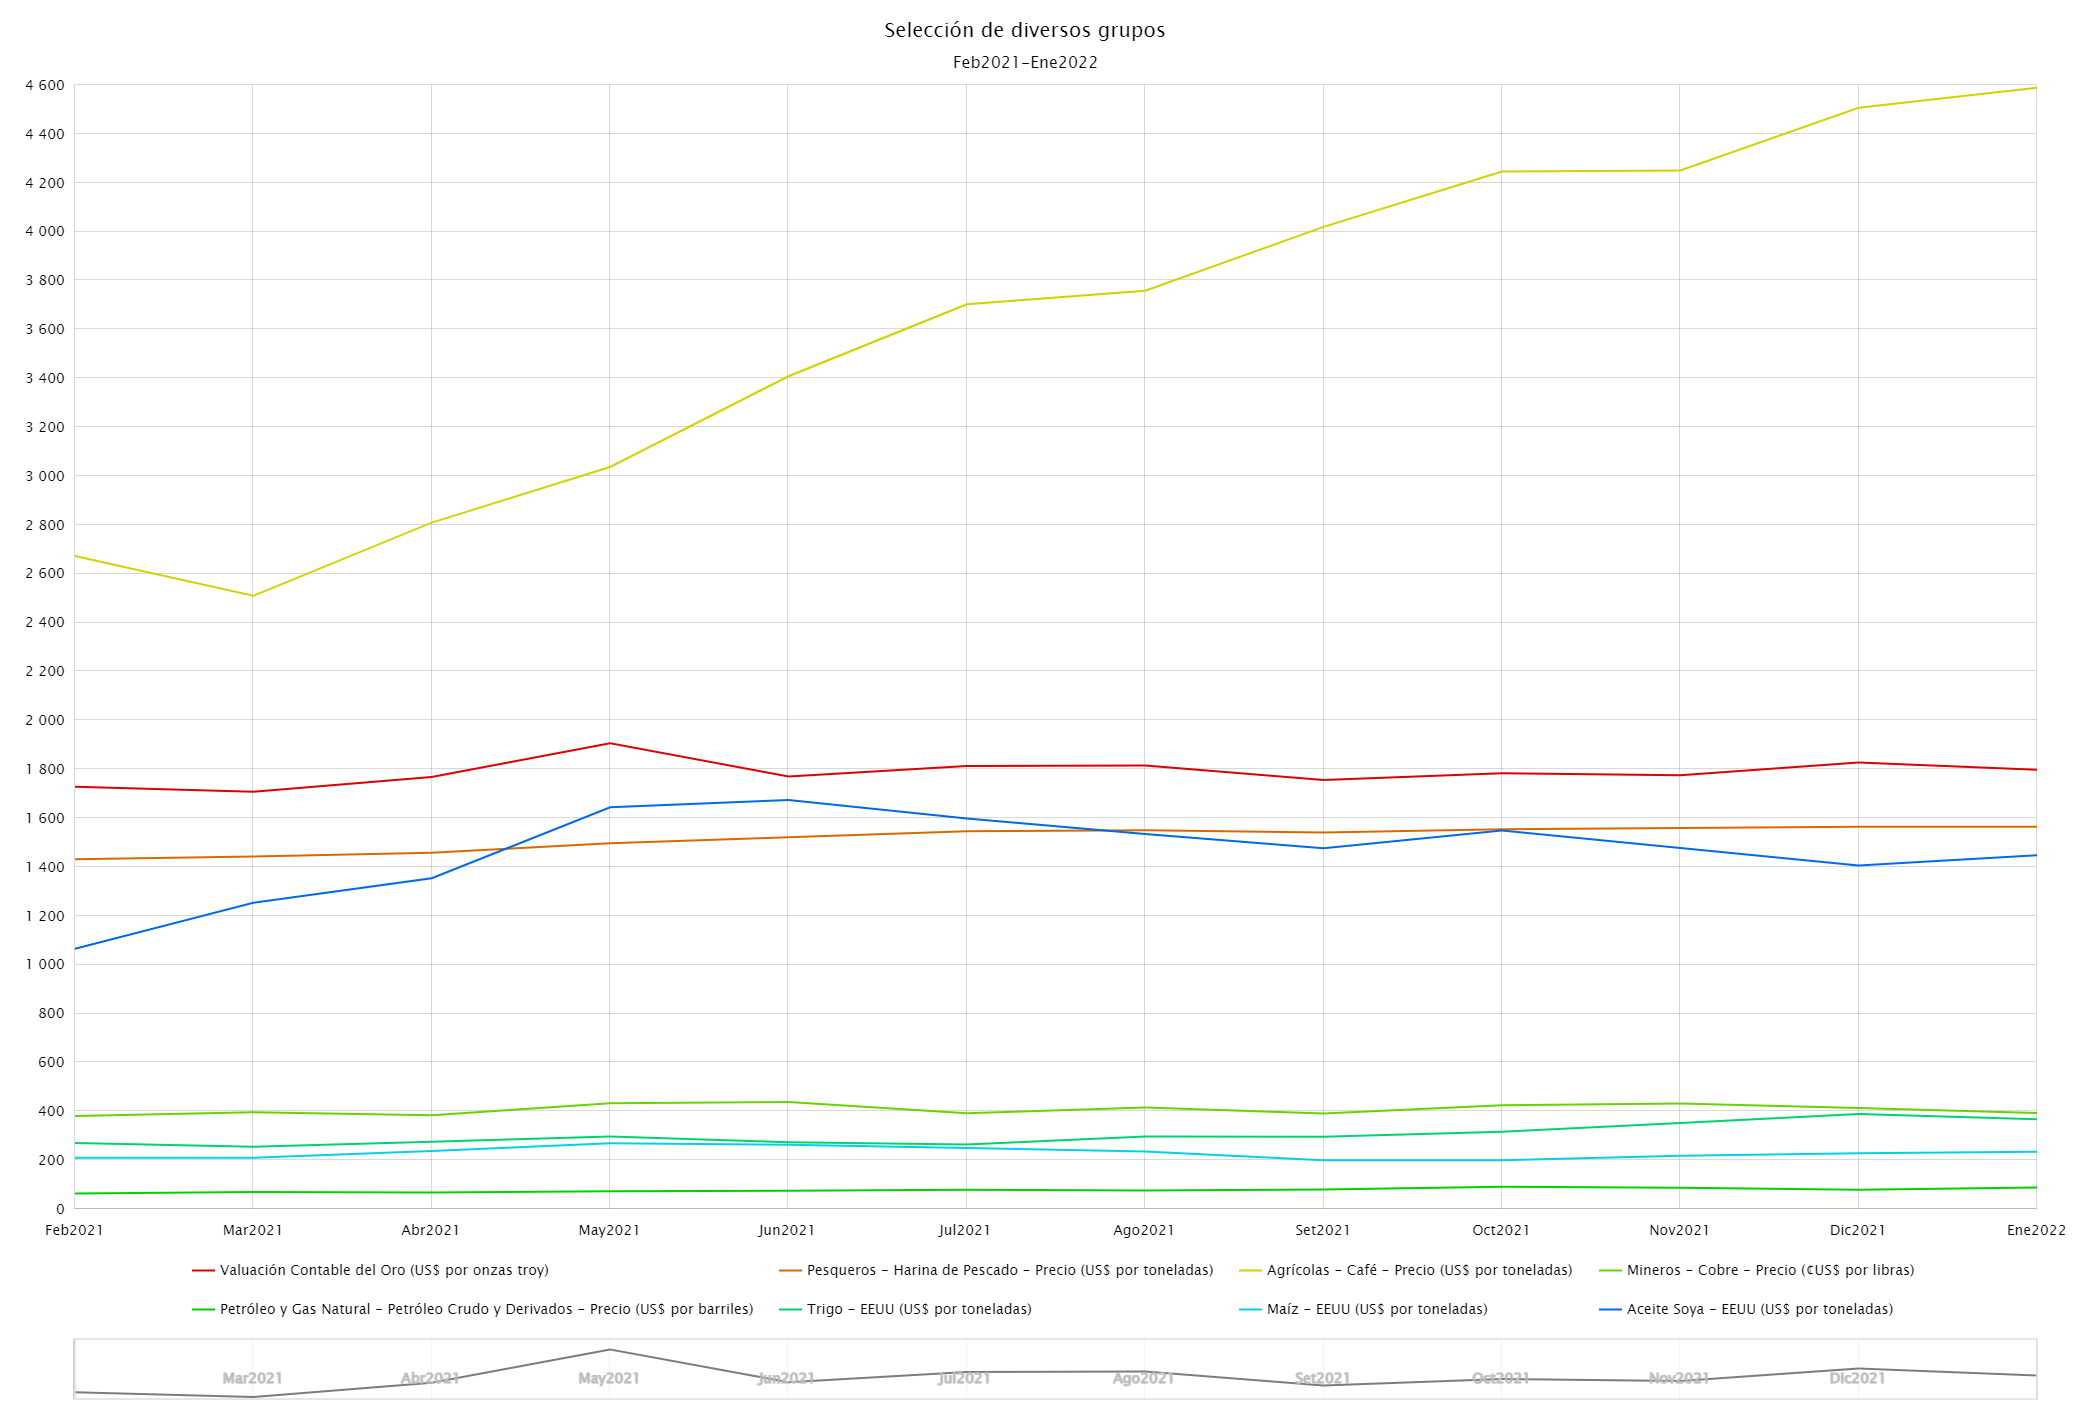

In [31]:
bcrp.bcrp_graph( ['PN38766BM', 'PN38779BM', 'PN38784BM', 'PN06484IM', 'PN01661XM', 'PN01662XM', 'PN01664XM', 'PN38810BM'] , '2021-02' , '2022-01')

Most recent download: C:\Users\estca/Downloads\grafico (2).png


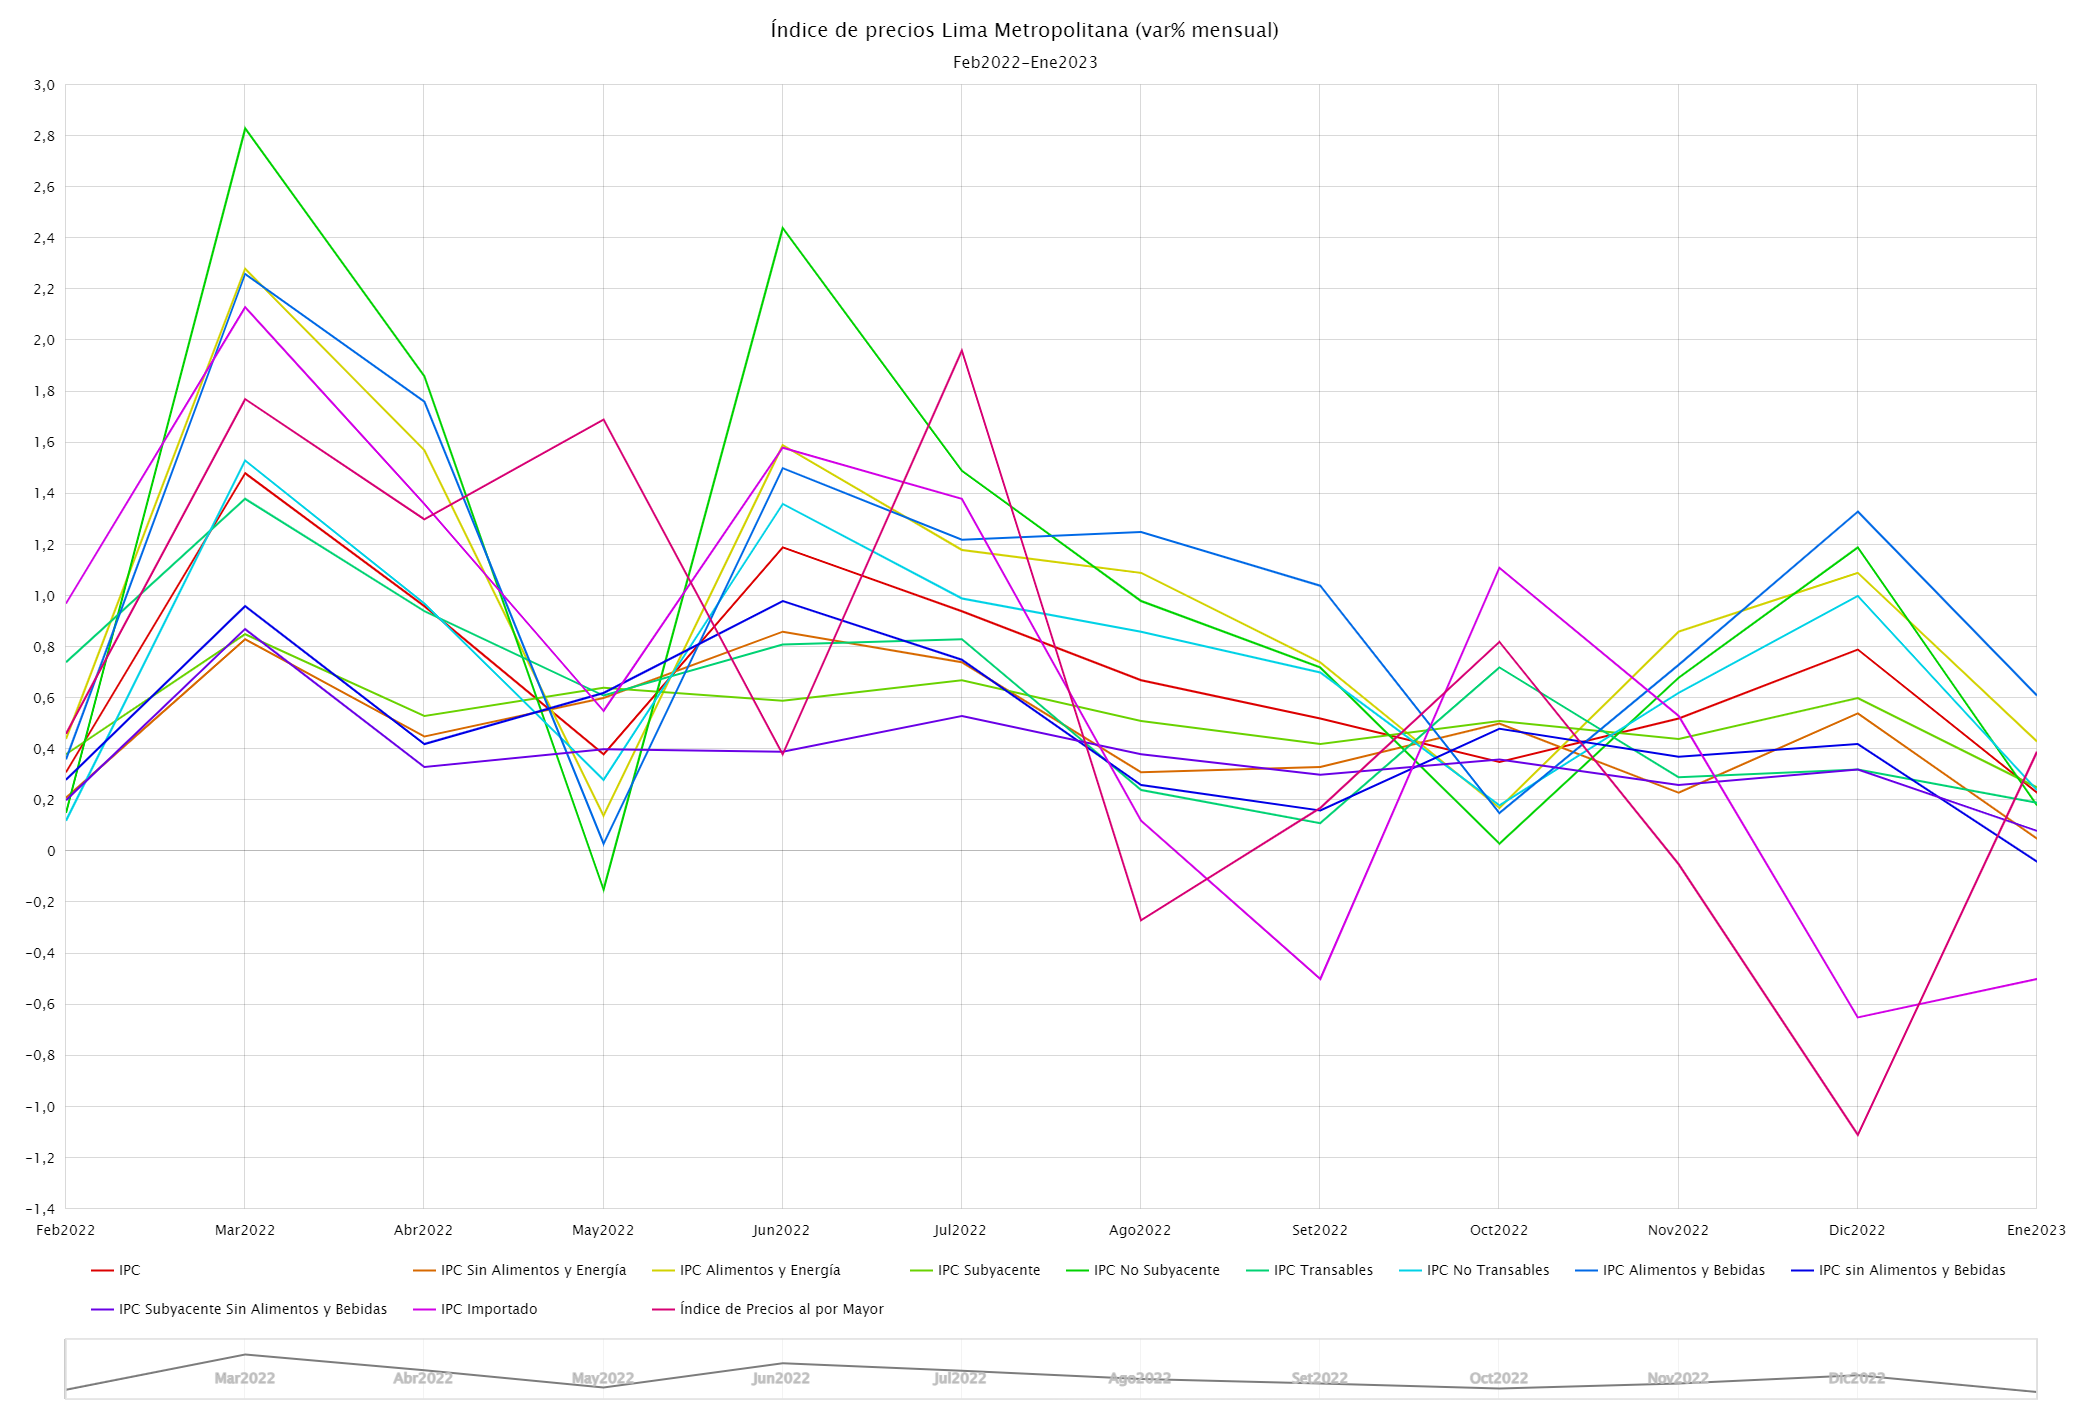

In [32]:
bcrp.bcrp_graph(['PN01271PM', 'PN01280PM', 'PN01282PM', 'PN01278PM', 'PN09817PM','PN09816PM', 'PN01276PM', 'PN01313PM', 'PN01314PM',  
             'PN01315PM', 'PN09818PM','PN01286PM'], '2022-02', '2023-01')

### `download_graph()`
This function operates similarly to `bcrp_graph()` with the main difference being that it automatically downloads the graph

In [33]:
bcrp.download_graph( ['PD09919MA', 'PD09920MA'] , '2015' , '2022' , format= 'jpg')

In [34]:
bcrp.download_graph( ['PD09919MA', 'PD09920MA'] , '2015' , '2022' , format= 'pdf')

### Summary of `bcrp_graph` and `download_graph`

| Feature             | `bcrp_graph`                                         | `download_graph`                                           |
|---------------------|---------------------------------------------------------|---------------------------------------------------------|
| **main input**                   | `variable code (str/list)`     | `variable code (str/list)`      |     
| **start/end date**               | `yes`     | `yes`      |     
| **frequency**              | `no`     | `no`      |   
| **output**                  | `plot of the variables selected`  | `downloads a plot of the variables selected` | 
| **uses sellenium**          | `yes`             | `yes`                   |  

# <a id="t2"></a>2. Yahoo Finance

In [35]:
# !pip install yfinance
import yfinance as yf

## <a id="t2.1"></a>2.1. Importing stock prices from Yahoo Finance

### `.Ticker()`

In [36]:
apple = yf.Ticker("AAPL")
nvidia = yf.Ticker("NVDA")
google = yf.Ticker("GOOG")

In [37]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [38]:
apple_info = apple.info

In [39]:
apple_info['country']

'United States'

In [40]:
apple_info['sector']

'Technology'

In [41]:
apple_info['debtToEquity']

140.968

In [42]:
apple_info['bookValue'] 

4.837

In [43]:
apple_info['ebitda']

129629003776

### `.history()`

In [44]:
apple.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-07-01 00:00:00-04:00,212.089996,217.509995,211.919998,216.750000,60402900,0.0,0.0
2024-07-02 00:00:00-04:00,216.149994,220.380005,215.100006,220.270004,58046200,0.0,0.0
2024-07-03 00:00:00-04:00,220.000000,221.550003,219.029999,221.550003,37369800,0.0,0.0
2024-07-05 00:00:00-04:00,221.649994,226.449997,221.649994,226.339996,60412400,0.0,0.0
2024-07-08 00:00:00-04:00,227.089996,227.850006,223.250000,227.820007,59085900,0.0,0.0
2024-07-09 00:00:00-04:00,227.929993,229.399994,226.369995,228.679993,48076100,0.0,0.0
2024-07-10 00:00:00-04:00,229.300003,233.080002,229.250000,232.979996,62627700,0.0,0.0
2024-07-11 00:00:00-04:00,231.389999,232.389999,225.770004,227.570007,64710600,0.0,0.0
2024-07-12 00:00:00-04:00,228.919998,232.639999,228.679993,230.539993,53046500,0.0,0.0


In [45]:
apple.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00-04:00,224.000000,224.800003,217.130005,218.539993,61777600,0.0,0.0
2024-07-25 00:00:00-04:00,218.929993,220.850006,214.619995,217.490005,51391200,0.0,0.0
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.0,0.0


<Axes: xlabel='Date'>

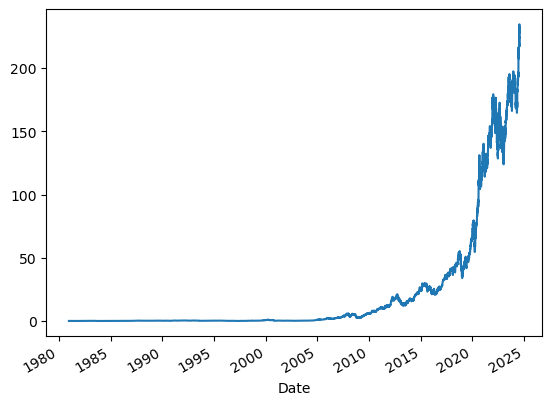

In [46]:
apple.history(period="max")["Close"].plot()

# <a id="t3"></a>3. Extracting from other databases

## <a id="t3.1"></a>3.1 Using Econdata
Econdata is a library for the extraction of time series of the main economic institutions for Peru. The current version includes the following institutions:

1. Central Reserve Bank of Peru (BCRP) 
2. World Bank (WB)
3. Federal Reserve Economic Data (FRED)
4. International Monetary Fund (IMF)
5. Organization for Economic Co-operation and Development (OECD)
6. Yahoo! Finance (YFinance)

More information: <a href="https://github.com/mauricioalvaradoo/econdata?tab=readme-ov-file#instalaci%C3%B3n" target="_blank">    here </a>

In [47]:
# pip install econdata

In [48]:
from econdata import BCRP
from econdata import WB
from econdata import FRED
from econdata import OECD
from econdata import YFinance
from econdata import IMF

### `search()`

In [49]:
BCRP.search(
    consulta=['PBI'],
    grupo=['Producto', 'variaciones'],
    frecuencia='Trimestral'
)

,Grupo de serie,Nombre de serie,Frecuencia,Fecha de inicio,Fecha de fin
Código de serie,,,,,
PN02507AQ,Producto bruto interno (variaciones porcentuales),PBI Global,Trimestral,T1-1980,T4-2023
PN02526AQ,Producto bruto interno por tipo de gasto (vari...,PBI,Trimestral,T1-1980,T4-2023


In [50]:

WB.search(
    consulta=['gdp', 'per', 'capita']
)

,title
id,
NY.GDP.PCAP.CD,GDP per capita (current US$)
NY.GDP.PCAP.CN,GDP per capita (current LCU)
NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)
NY.GDP.PCAP.KN,GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)"
NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation..."
PA.NUS.PPP,PPP can be used to convert national accounts d...
SE.XPD.PRIM.PC.ZS,"Government expenditure per student, primary (%..."


In [51]:
WB.search(
    ['life', 'expectancy']
)

,title
id,
SH.DYN.0509,Mortality rates for different age groups (infa...
SH.DYN.MORT,Mortality rates for different age groups (infa...
SP.DYN.CDRT.IN,The crude death rate is a good indicator of th...


In [52]:
YFinance.search(
    consulta=['Microsoft']
)

,Name,Country,IPO Year,Sector,Industry
Symbol,,,,,
MSFT,Microsoft Corporation Common Stock,United States,1986,Technology,Computer Software: Prepackaged Software


In [53]:
IMF.search('Indicadores', ['GDP'])

,Nombres,Unidades,Dataset
Código,,,
NGDP_RPCH,Real GDP growth,Annual percent change,WEO
NGDPD,"GDP, current prices",Billions of U.S. dollars,WEO
NGDPDPC,"GDP per capita, current prices\n",U.S. dollars per capita,WEO
PPPGDP,"GDP, current prices",Purchasing power parity; billions of internati...,WEO
PPPPC,"GDP per capita, current prices",Purchasing power parity; international dollars...,WEO
PPPSH,"GDP based on PPP, share of world",Percent of World,WEO
BCA_NGDPD,"Current account balance, percent of GDP",Percent of GDP,WEO
rev,"Government revenue, percent of GDP",% of GDP,FPP
exp,"Government expenditure, percent of GDP",% of GDP,FPP


In [54]:
IMF.search('Países', ['Chile'])

,Nombres
Código,
CHL,Chile


In [55]:
IMF.search('Países', ['Peru'])

,Nombres
Código,
PER,Peru


### `.get_data()`

In [56]:
df = BCRP.get_data(
    {
        'PN01207PM': 'TC Interbancario promedio - pdp',
        'PN01205PM': 'TC Interbancario compra - pdp',
        'PN01206PM': 'TC Interbancario venta - pdp'
    },
    fechaini = '2000-01',
    fechafin = '2022-01'
)
df.head()

,TC Interbancario promedio - pdp,TC Interbancario compra - pdp,TC Interbancario venta - pdp
2000-01-01,3.499776,3.498686,3.500867
2000-02-01,3.455024,3.453443,3.456605
2000-03-01,3.442857,3.441504,3.444209
2000-04-01,3.478736,3.477294,3.480178
2000-05-01,3.504061,3.503100,3.505023


In [57]:
df = WB.get_data(
    countries = {
        'BR': 'Brasil',
        'CL': 'Chile',
        'PE': 'Perú'
    },
    indicators = {
        'SP.DYN.LE60.MA.IN': 'Life expectancy at age 60, male'
    },
    fechaini = '1977',
    fechafin = '2022'
)
df = df.dropna()
df.head(10)

,Brasil,Chile,Perú
,"Life expectancy at age 60, male","Life expectancy at age 60, male","Life expectancy at age 60, male"
time,,,
1977,16.5432,15.1183,15.2375
1978,16.6148,15.2490,15.2596
1979,16.7079,14.9984,15.2383
1980,16.7750,15.2033,15.1506
1981,16.8489,15.7035,15.0092
1982,16.9110,15.6116,14.8410
1983,16.9678,15.2794,14.6944
1984,17.0113,15.3338,14.6344


In [58]:
df = IMF.get_data(
    'NGDP_RPCH',
    {
         'PER': 'Perú',
         'CHL': 'Chile'
    }
)
df.head()

,CHL,PER
1980,7.9,7.7
1981,6.2,5.5
1982,-13.6,-0.3
1983,-2.8,-9.3
1984,5.9,3.8


In [59]:
YFinance.get_data(
    {
        'AAPL': 'Apple',
        'MSFT': 'Microsoft',
        'TSLA': 'Tesla'
    },
    fechaini = '2015-01-01',
    fechafin = '2022-12-31'
)

,Apple,Microsoft,Tesla
Date,,,
2015-01-02,24.402172,40.305363,14.620667
2015-01-05,23.714720,39.934734,14.006000
2015-01-06,23.716953,39.348595,14.085333
2015-01-07,24.049517,39.848537,14.063333
2015-01-08,24.973557,41.020794,14.041333
...,...,...,...
2022-12-23,130.782578,235.769760,123.150002
2022-12-27,128.967499,234.021713,109.099998
2022-12-28,125.010109,231.621841,112.709999


In [60]:
YFinance.get_data(
    {
        'AAPL': 'Apple',
        'MSFT': 'Microsoft',
        'TSLA': 'Tesla'
    }
)

,Apple,Microsoft,Tesla
Date,,,
1980-12-12,0.099058,NaN,NaN
1980-12-15,0.093890,NaN,NaN
1980-12-16,0.086999,NaN,NaN
1980-12-17,0.089152,NaN,NaN
1980-12-18,0.091737,NaN,NaN
...,...,...,...
2024-07-24,218.539993,428.899994,215.990005
2024-07-25,217.490005,418.399994,220.250000
2024-07-26,217.960007,425.269989,219.800003
